<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla y Ignacio Meza D.
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias y Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Javier Santidrián Salas
- Nombre de alumno 2: Patricio Yáñez Alarcón


### **Link de repositorio de GitHub:** https://github.com/jsantidrian/labs-Santidrian-Yanez

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/U/11 Semestre/Lab Progra/Labs/Lab 10/diabetes_data.csv')
df

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

Notar que hay 70.692 datos (filas) y 18 variables (columnas), donde todas las variables son de tipo float y sin datos faltantes.

## 2. Clasificación de pacientes con diabetes (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.), comente sus decisiones y los resultados obtenidos con el modelo. ¿Es acaso un buen predictor de diabetes?, ¿Qué buscan explicar las métricas utilizadas?, ¿las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo una buena elección de las features?.

**Solución**:

Instalamos xgboost:

In [ ]:
!pip install xgboost

Creamos matriz de características y variable objetivo:

In [ ]:
X, y = df.drop(columns=['Diabetes']), df['Diabetes']

In [ ]:
X.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP'],
      dtype='object')

Vemos la distribución de clases:

In [ ]:
y.value_counts()

0.0    35346
1.0    35346
Name: Diabetes, dtype: int64

La distribución es perfectamente balanceada.

Separamos en train-test en proporción 80-20 de manera estratificada:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

Creamos objetos para pre-procesar los datos con MinMaxScaler (normalización, notemos que no tenemos datos categóricos por lo tanto con esto es suficiente) y clasificar con XGBClassifier:

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Normalización
scaler = MinMaxScaler()

# Column transformer de preprocesamiento
preprocesamiento = ColumnTransformer(
    transformers=[
        ('minmax', scaler, X.columns)
    ],
    verbose_feature_names_out=False
).set_output(transform="pandas")

# Clasificador XGBoost
xgbc = xgb.XGBClassifier(seed=42)

# Pipeline de preprocesamiento y clasificación
pipe_xgbc = Pipeline([
    ('preprocessing', preprocesamiento),
    ('xgboost', xgbc)
])

# Ajuste a los datos y predicción
pipe_xgbc.fit(X_train, y_train)
y_pred_xgbc = pipe_xgbc.predict(X_test)

# Impresión de resultados
print(classification_report(y_test, y_pred_xgbc))

              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73      7070
         1.0       0.73      0.79      0.76      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



Observaciones:

- Buen accuracy de 0.75 (por lo tanto predice bien, pero también hay harto error).

- Buen error de recall y precision, por lo tanto no hay una gran cantidad de falsos negativos ni falsos positivos, recordar que en nuestro caso queremos minimizar falsos negativos (pues no queremos enfermos de diabetes que no sean tratados), por lo tanto necesitamos maximizar recall.

## 3. Importancia de las features con XGBoost (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

**Solución**:

Método Weight:

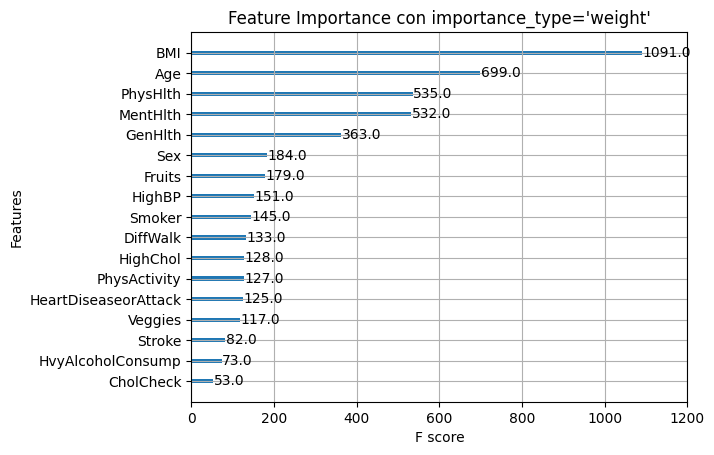

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(xgbc, max_num_features=20, importance_type="weight")
plt.title("Feature Importance con importance_type='weight'")
plt.show()

Método Cover:

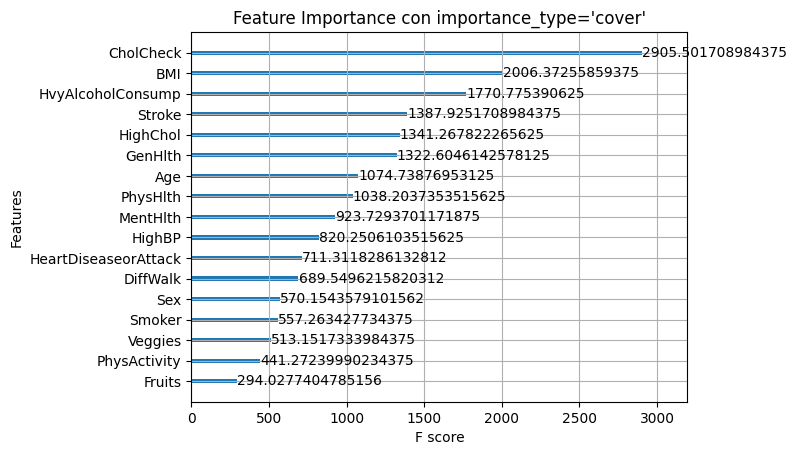

In [ ]:
xgb.plot_importance(xgbc, max_num_features=20, importance_type="cover")
plt.title("Feature Importance con importance_type='cover'")
plt.show()

Método Gain:

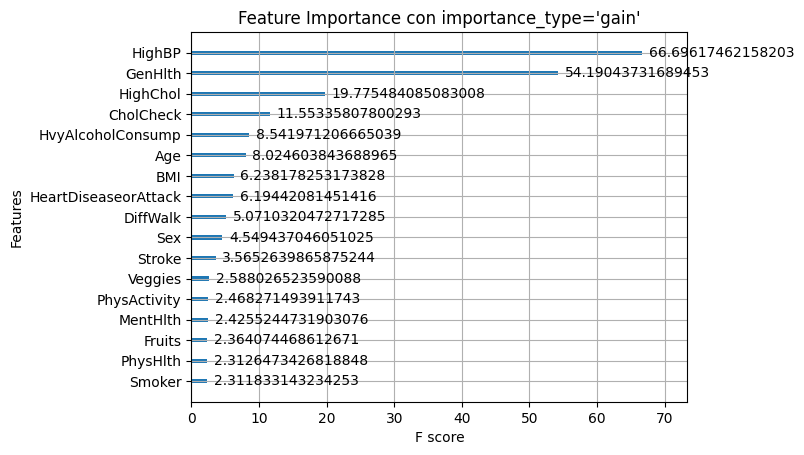

In [ ]:
xgb.plot_importance(xgbc, max_num_features=20, importance_type="gain")
plt.title("Feature Importance con importance_type='gain'")
plt.show()

Observaciones:

- ajfd

El parámetro importance_type en la función xgb.plot_importance de XGBoost representa el tipo de importancia utilizado para calcular y mostrar la importancia de las características en el modelo.

Existen diferentes tipos de importancia que se pueden calcular en XGBoost, y el parámetro importance_type permite especificar qué tipo de importancia se desea visualizar en el gráfico.

Los valores posibles para el parámetro importance_type son los siguientes:

"weight": Esta opción muestra la importancia de las características según el número de veces que se utilizan para dividir los nodos en los árboles del modelo. Cuanto más se utilice una característica para dividir los nodos, mayor será su importancia.

"gain": Esta opción muestra la importancia de las características según la ganancia promedio obtenida al utilizarlas para dividir los nodos en los árboles del modelo. La ganancia se calcula como la reducción de la función de pérdida (como la entropía o el error cuadrático medio) al realizar una partición basada en una característica específica.

"cover": Esta opción muestra la importancia de las características según la cobertura promedio obtenida al utilizarlas para dividir los nodos en los árboles del modelo. La cobertura se refiere al número promedio de muestras afectadas por las divisiones realizadas con una característica determinada.

Cada opción de importance_type proporciona una perspectiva diferente sobre la importancia de las características en el modelo de XGBoost. Dependiendo del contexto y los objetivos específicos, se puede elegir el tipo de importancia más relevante para el análisis.

Las observaciones que se pueden ver es que para cada método hay features que tienen mayor o menor importancia, con lo que hay algunas que se van repitiendo según cambian los métodos. Esto puede ser un buen ind¡cio de lo impolrtantes o relevantes que pueden ser.

Método wight con BMI, Age, PhysHlth, MentHlth, GenHlth

Método cover con CholCheck, BMI,HvyAlcoholConsump , Stroke, HighChol

Método gain con HighBP, GenHlth, HighChol, CholCheck,HvyAlcoholConsump

Con lo que podemos notar que hay valores que se repiten estos deben ser considerados.

## 4. Métodos Agnósticos Globales (1 pt)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. Visualice los resultados de este método en un gráfico. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala esta?). Además, responda las siguientes preguntas:


- ¿Cómo mide la importancia de las features su propuesta?
- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?
- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

**Solución**:

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(pipe_xgbc, X_test, y_test, n_repeats=30, random_state=42)

Importancias de cada variable para cada una de las 30 repeticiones del proceso (junto con su promedio y desviación estándar):

In [ ]:
result

{'importances_mean': array([ 2.79604875e-02,  3.19918900e-03,  1.14529552e-02,  2.93750147e-03,
         3.06693071e-02,  8.25140863e-05,  3.88759224e-03,  1.44517528e-03,
         3.65419525e-04,  1.62670627e-04,  4.04790532e-03,  5.44262913e-02,
        -7.02548506e-04,  2.56736686e-03,  3.39486527e-03,  1.10097367e-03,
         1.64792418e-02]),
 'importances_std': array([0.00226415, 0.00101473, 0.00157165, 0.00068028, 0.00248433,
        0.00082482, 0.00090748, 0.00074441, 0.00075671, 0.00066902,
        0.00082998, 0.00265971, 0.0011747 , 0.00133536, 0.00075427,
        0.00052537, 0.00156677]),
 'importances': array([[ 3.08366928e-02,  2.63809322e-02,  3.09074192e-02,
          2.46834995e-02,  2.89270811e-02,  2.87149020e-02,
          2.74418276e-02,  2.94928920e-02,  2.52493104e-02,
          2.82198175e-02,  2.90685338e-02,  2.73711012e-02,
          2.44005941e-02,  2.80783648e-02,  3.11195983e-02,
          2.73711012e-02,  2.80076384e-02,  3.04830610e-02,
          3.11195

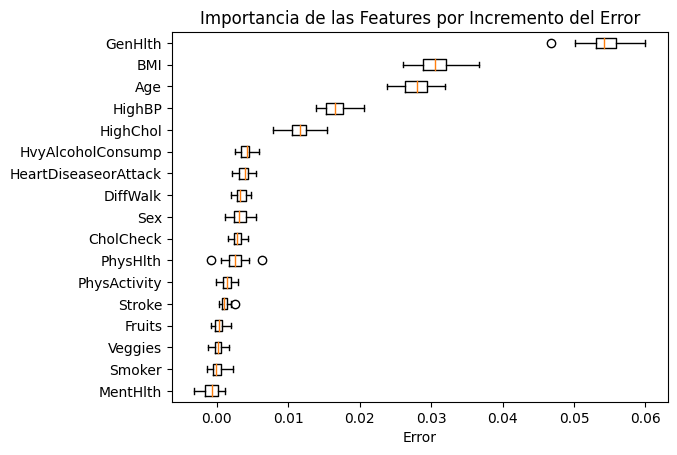

In [ ]:
perm_sorted_idx = result.importances_mean.argsort()
plt.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=np.array(X.columns)[perm_sorted_idx],
)
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()

**¿Cómo mide la importancia de las features su propuesta?:**

R: Se evalúa qué tanto cambia el rendimiento del modelo cuando se cambia el orden de las características, es decir se ajusta a la variacion en la precision del modelo al cambiar el orden.

**¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?:**

R: Las primeras 5 tienen correspondencia con la unión de la parte anterior, es decir weight, cover y gain, mencionan los mismos features en los primeros lugares. Los mejor rankeados son GenHlth, BMI, Age, HighBP y HighChol.

**¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?:**

R: Dejan de considerarse tanto  PhysHlth, MentHlth,HvyAlcoholConsump , Stroke, CholCheck así que si bien concuerda pero no en todas la features.

**Nombre y explique 3 ventajas y 3 desventajas del método implementado:**

**Ventajas**

- Comparable con diferentes modelos: Es agnóstico al modelo, lo que significa que se puede utilizar en diferentes tipos de modelos de aprendizaje automático sin necesidad de ajustar el método.
- Toma en cuenta las interacciones: Porque al permutar una característica, se pueden ver los efectos que tiene sobre otras características y cómo cambia la importancia global de todas ellas.
- No necesita re-entrenar el modelo: Porque mantiene el modelo sin cambios, ya entrenado.

**Desventajas**

- Está ligado al error del modelo:lo que significa que la calidad del modelo puede afectar la calidad de la medida de importancia de características.
- Necesitas tener acceso a la "gold label": (etiqueta de referencia), lo que puede no ser posible en ciertos casos.
- Si las características están correlacionadas: puede generar sesgos por entradas poco realistas.


**Observaciones**:
- La desviación estándar (std) en Permutation Feature Importance representa la variabilidad en los resultados al permutar las características del conjunto de datos.
Una desviación estándar más baja indica una mayor confianza en la estimación de la importancia de la característica, mientras que una mayor desviación estándar indica que los resultados de las permutaciones son más variables, lo que puede deberse a diferentes factores, como la sensibilidad del modelo a esa característica en particular o la presencia de interacciones entre características.

## 5. Métodos Agnósticos Locales (2 pt)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### Parte A (0.4 pt)

Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. ¿Qué representa cada número en su resultado? ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 14.3 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [ ]:
import shap
X_shap = pipe_xgbc.named_steps['preprocessing'].fit_transform(X_train)
explainer = shap.TreeExplainer(xgbc, X_shap, feature_names = pipe_xgbc.named_steps['preprocessing'].get_feature_names_out())
shap_values = explainer(X_shap)
shap_values

100%|===================| 56388/56553 [04:54<00:00]       

.values =
array([[ 0.34115316,  0.0824993 , -0.23980178, ..., -0.0649905 ,
        -0.02499852,  0.34065788],
       [-0.11652944, -0.10862396,  0.34536041, ..., -0.04529917,
        -0.00310877, -0.42205238],
       [ 0.34693099, -0.16553323, -0.33617838, ...,  0.09288687,
        -0.02208737,  0.37696878],
       ...,
       [-0.55013043, -0.03935259, -0.58445038, ..., -0.0540815 ,
         0.00912535, -0.48217963],
       [ 0.45877761, -0.11209015,  0.25163548, ..., -0.01193569,
        -0.00743819, -0.34350895],
       [-0.25385471,  0.10532323, -0.36709013, ..., -0.14454725,
        -0.0417218 ,  0.42327078]])

.base_values =
array([-0.06954543, -0.06954543, -0.06954543, ..., -0.06954543,
       -0.06954543, -0.06954543])

.data =
array([[0.75      , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.83333333, 0.        , 0.        , ..., 1.        , 0.   

**Observaciones:**
- Cada número representa la contribución relativa de esa feature a la predicción del modelo para una determinada instancia. Es posible atribuir un significado a la positividad o negatividad de cada valor, ya que un valor positivo indica que esa feature aumentó la predicción del modelo para esa instancia, mientras que un valor negativo indica que esa feature disminuyó la predicción del modelo para esa instancia

### Parte B (0.4 pt)

Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:
- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?
- ¿Existe algún patrón común entre las instancias analizadas?
- ¿Es posible generalizar estas conclusiones a todo el dataset?

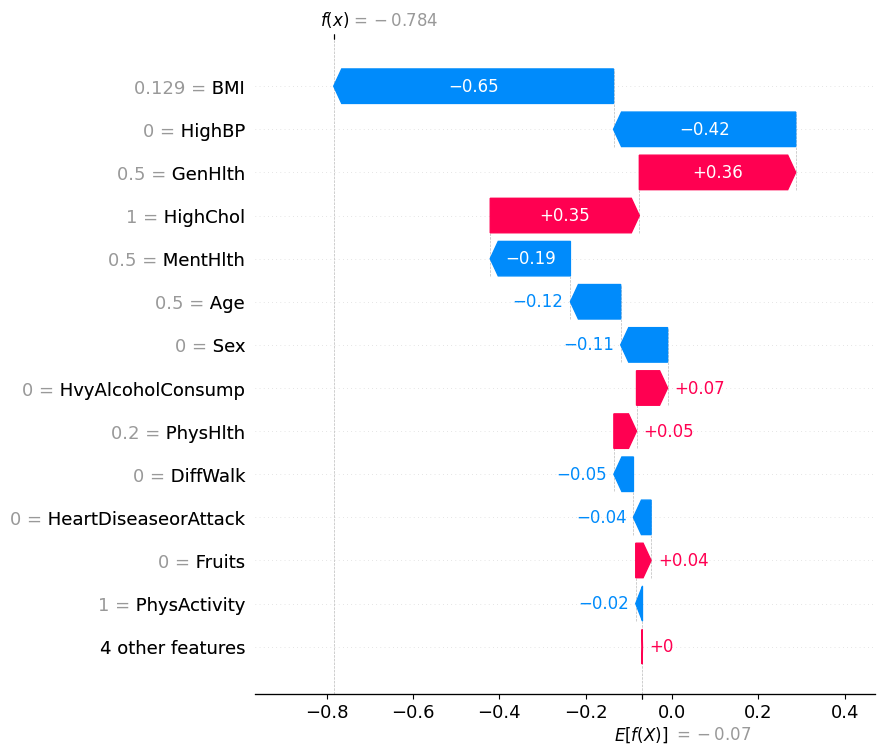

In [ ]:
idx=1
shap.plots.waterfall(shap_values[idx,:],
                     max_display=14)

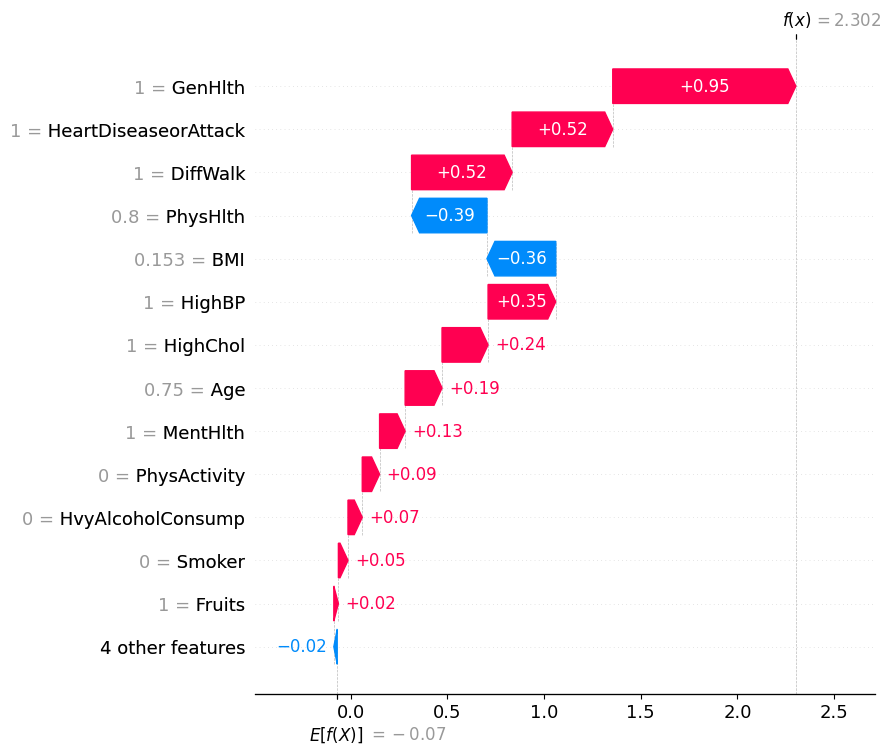

In [ ]:
idx=9
shap.plots.waterfall(shap_values[idx,:],
                     max_display=14)

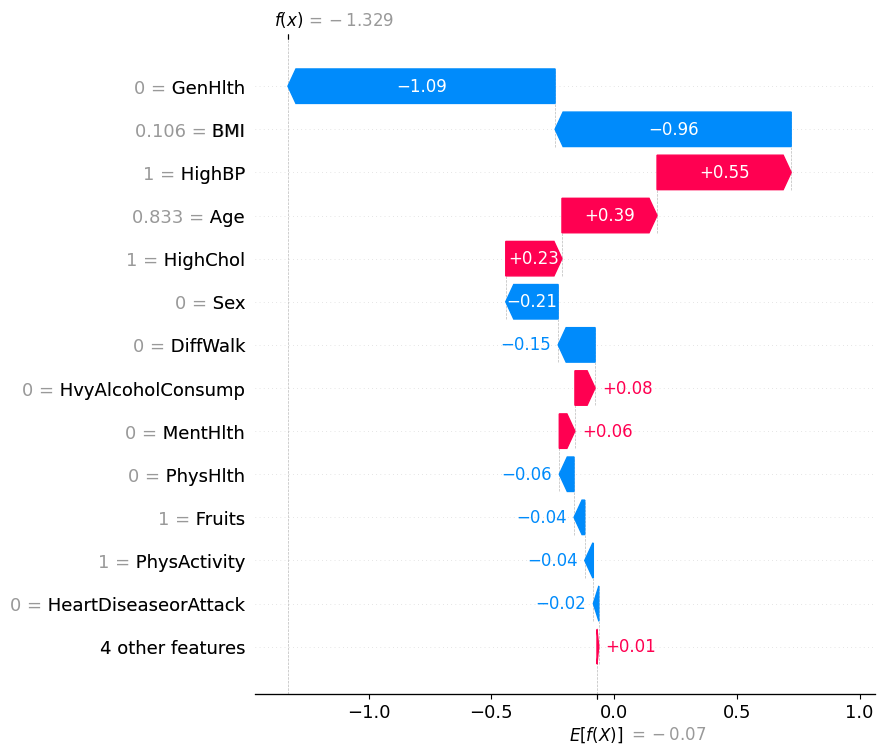

In [ ]:
idx=150
shap.plots.waterfall(shap_values[idx,:],
                     max_display=14)

Usando los shap values calculados, grafique el *aporte* de las diferentes variables para las instancias *1, **9* y *150*, interprete sus resultados y responda:

**¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?:**

- Caso instancia 1:
Las variables que tienen mayor efecto negativamente son BMI, HighBP y MentHlth y positivamente GenHlth, HighChol y HvyAlcoholConsump.

- Caso instancia 9:
Las variables que tienen mayor efecto negativamente son BMI y PhysiHlth y positivamente HeartDeseasor, GenHlth, DiffWalk.

- Caso instancia 150:
Las variables que tienen mayor efecto negativamente son BMI, GenHlth y sex y positivamente , HighBP, HighChol y Age.

**¿Existe algún patrón común entre las instancias analizadas?**:

R: El patrón visible es que BMI está en las 3 instancias influyendo negativamente. y Positivamente HighChol está en la primera y última instancia.

**¿Es posible generalizar estas conclusiones a todo el dataset?:**

R: Al parecer no porque los resultados pueden no tener un patrón apreciable a primera vista, lo mejor sería ser un análisis de promedio de instancias o un poco más global para concluir algo del todo el Dataset.

### Parte C (0.4 pt)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

Grafico 1:

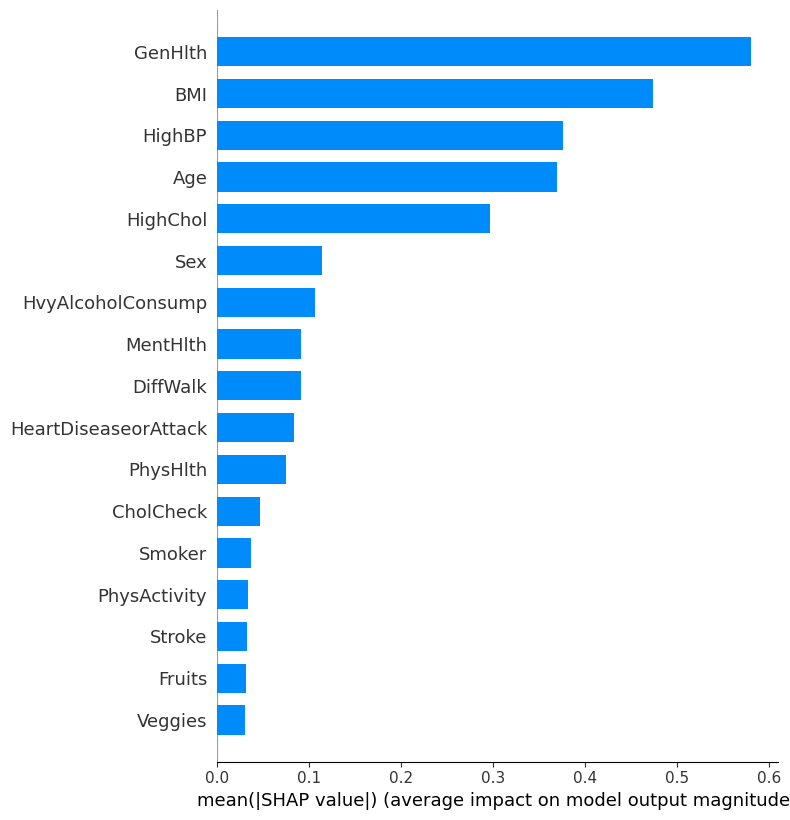

In [ ]:
shap.summary_plot(shap_values, X_shap, plot_type="bar")

Gráfico 2:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


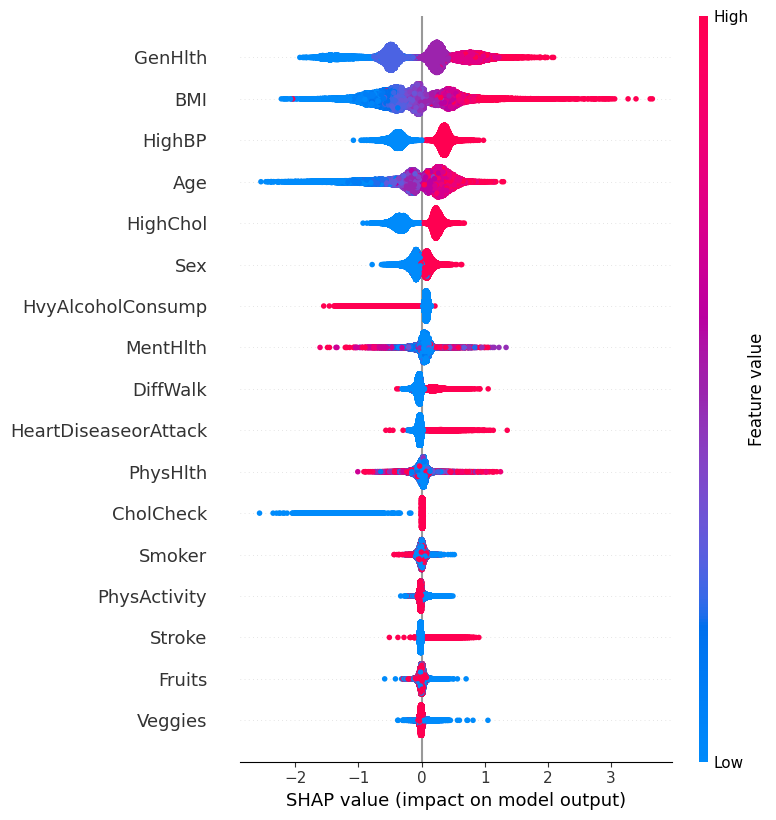

In [ ]:
shap.summary_plot(shap_values, X_shap)

Se puede ver una correspondencia con los valores que afectan positiva o negativamente, pero hay que toma en cuenta que el grafico  solo indica el valor absoluto, por lo que están consideradas las más importantes positiva o negativamnete , es usual ver BMI, GenHlth , etc.

### Parte D (0.4 pt)

Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

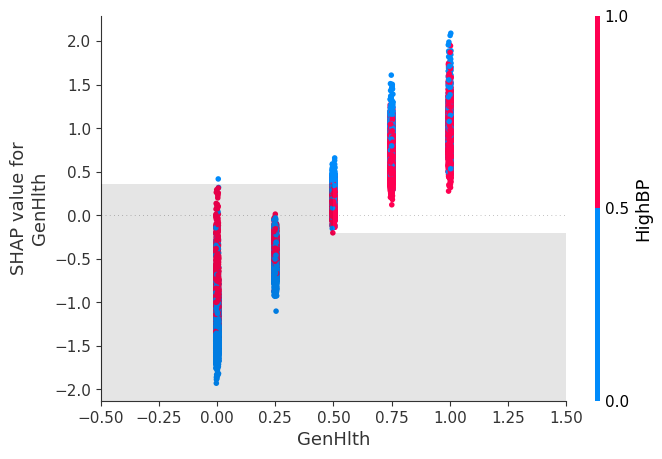

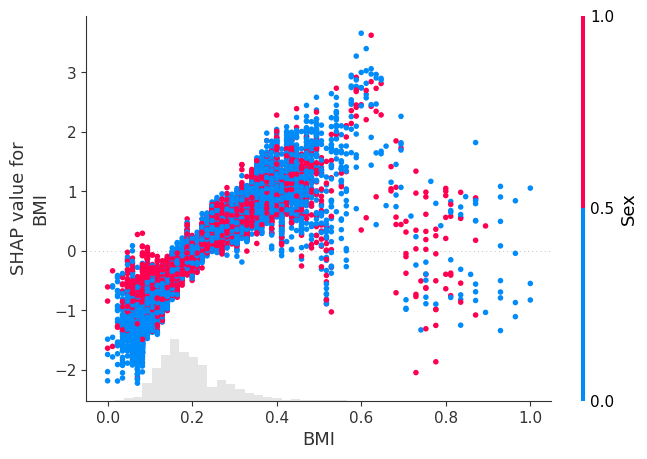

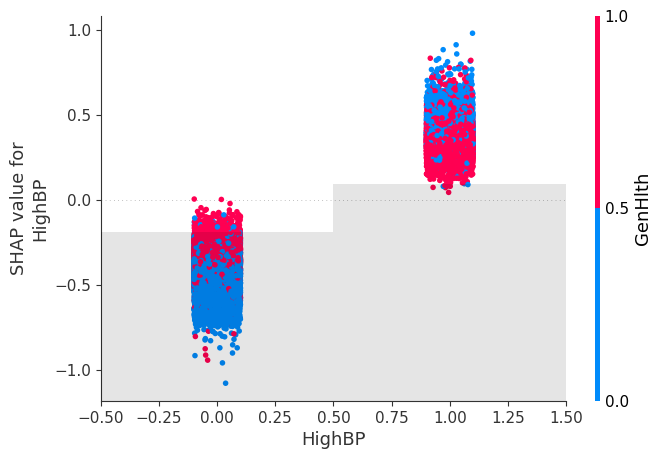

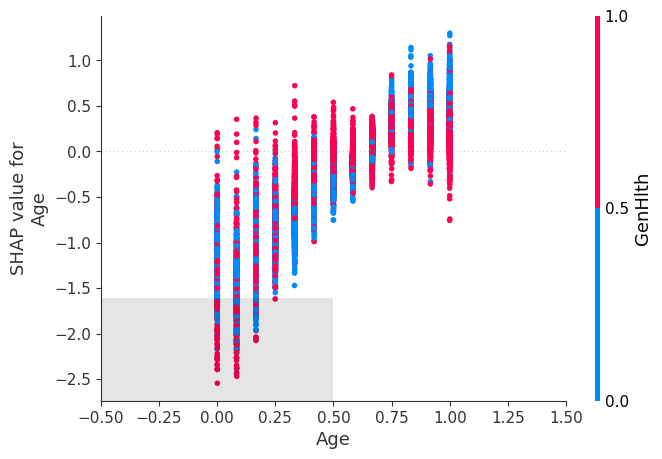

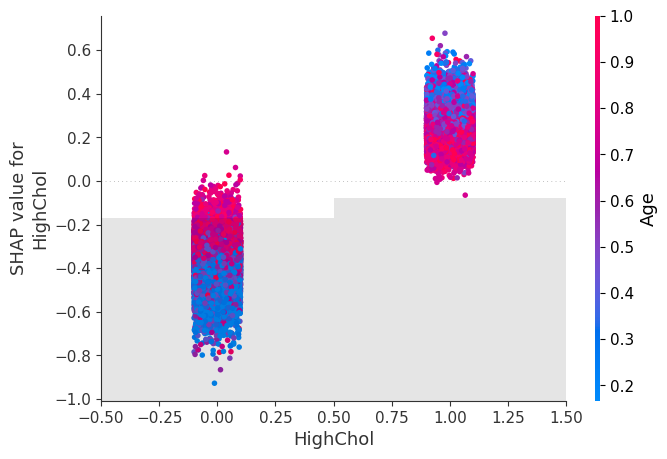

In [ ]:
# obtenemos los shap values
shap_values_abs = np.mean(np.abs(shap_values.values), axis=0)

# Obtenemos los nombres ordenados de mayor a menor
feature_importance_names = X_train.columns[shap_values_abs.argsort()[::-1]]

# Scatter plot shap values v/s 5 features con mayor impacto global
for name in feature_importance_names[:5]:
  shap.plots.scatter(shap_values[:,name],
                  color=shap_values)

**Observaciones:**

- La variable HighBP y HighChol tienen una relación muy similar entre sus valores y los shap values (tienen la misma forma en el scatterplot).

- La variable GenHlth y Age tienen una relación muy similar entre sus valores y los shap values (tienen la misma forma en el scatterplot).

- La variable BMI es la que tiene los shap values más dispersos de acuerdo a los valores (no hay un patrón claro).

### Parte E (0.4 pt)

Finalmente, se le pide generar un gráfico del tipo **Partial Dependence Plot** para las mismas 5 variables con mayor impacto global usando una submuestra de **1000 observaciones**. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

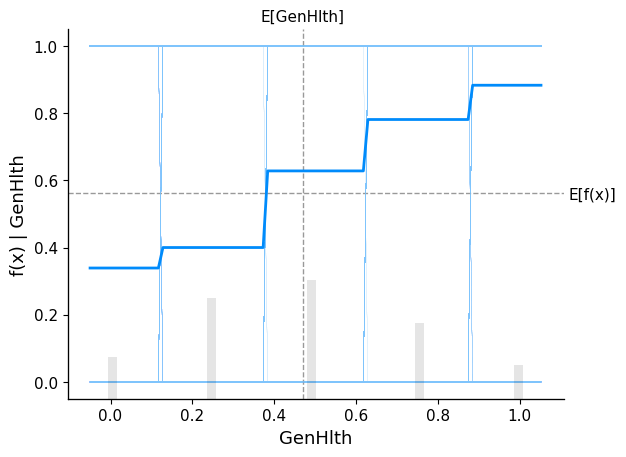

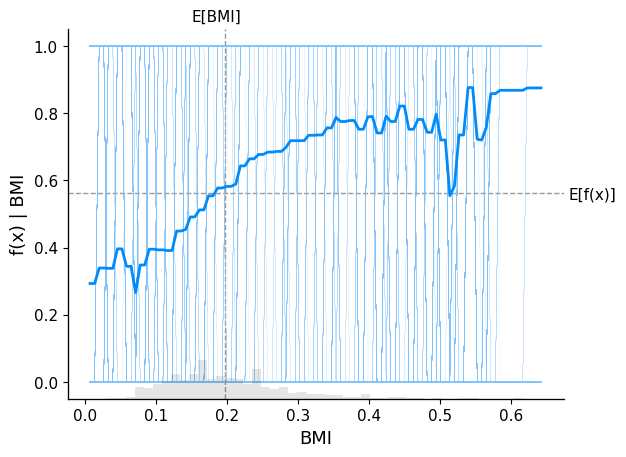

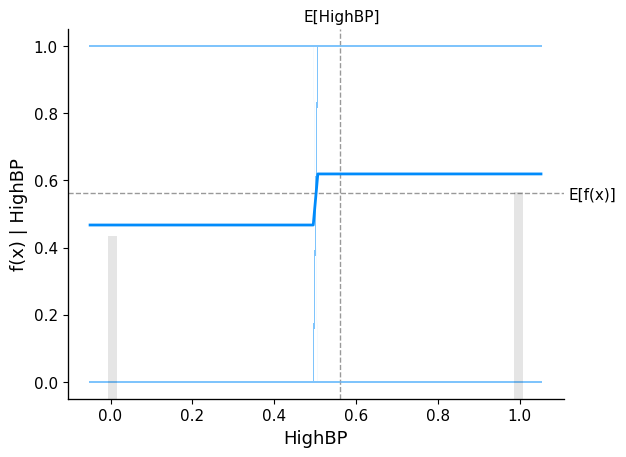

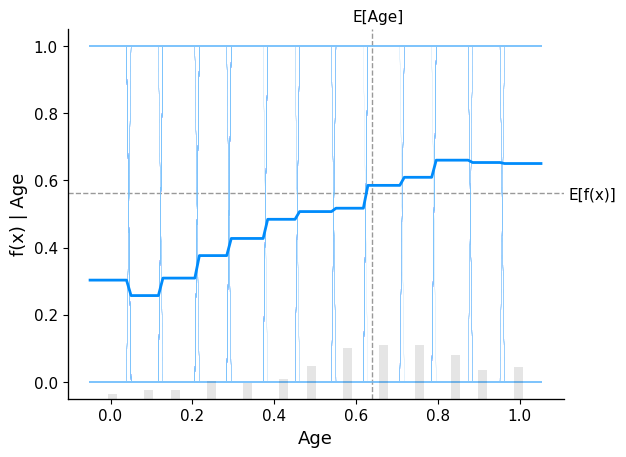

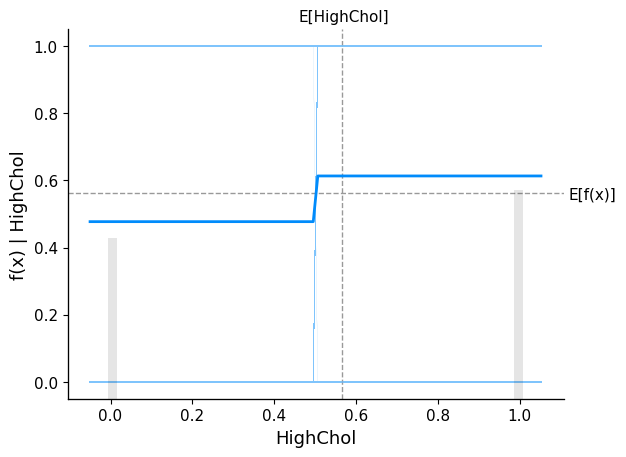

In [ ]:
X1000 = shap.utils.sample(X_shap, 1000)

for variable in feature_importance_names[:5]:
  shap.partial_dependence_plot(
      variable, xgbc.predict, X1000, model_expected_value=True,
      feature_expected_value=True, ice=True
  )

Se puede observar la funcion escalonada, correspondiente a la influencia a través de todas sus combinaciones del feature, lo que está bien respecto a la clase de interpretabilidad. En este caso la importancia del feature para la predicción.

## 6. Sistema de Reglas! (1 pt)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [ ]:
!pip install alibi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.0/524.0 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 83.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.0 MB/s eta 0:00:00


In [ ]:
from alibi.explainers import AnchorTabular

In [ ]:
predict_fn = lambda x: xgbc.predict(x)
explainer = AnchorTabular(predict_fn, xgbc.feature_names_in_, seed=1)
explainer.fit(X_train.to_numpy())
class_names = ["no_tiene_diabetes", "tiene_diabetes"]

In [ ]:
idx = 1000
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

Prediction:  tiene_diabetes
Anchor: PhysHlth > 0.00
Precision: 0.96
Coverage: 0.44


In [ ]:
idx = 3001
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

Prediction:  tiene_diabetes
Anchor: HighBP > 0.00 AND Smoker <= 0.00 AND Sex > 0.00 AND Age > 9.00
Precision: 1.00
Coverage: 0.05


In [ ]:
idx = 5751
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

Prediction:  tiene_diabetes
Anchor: PhysHlth > 0.00
Precision: 1.00
Coverage: 0.43


- idx = 1000: Si PhysHlth es mayor que 0.0 entonces el paciente tiene diabetes con una precisión de 0.96 y un coverage de 0.44 (44% de la población puede ser explicada por la regla).

- idx = 3001: Si HighBP > 0.00 AND Smoker <= 0.00 AND Sex > 0.00 AND Age > 9.00 entonces el paciente tiene diabetes con precisión 1.0 y un coverage de 0.05 (solo 5% puede ser explicado por la regla).

- idx = 5751: Igual que idx = 1000 pero precision 1.0 y coverage 0.43.

# Retrospectiva... (1 pt)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

> Fundamente su Respuesta aquí

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>